## t-SNE + CAH

In [6]:
import pandas as pd
import numpy as np

### Read datasets

In [7]:
df_help_center = pd.read_parquet("FT_SEARCH_TERMS.parquet")
df_help_center.shape

(85410, 4)

In [8]:
df_ipc = pd.read_parquet("IPC_SEARCH_QUERY_TERMS.parquet")
df_ipc.shape

(16127, 8)

In [9]:
df_google = pd.read_parquet("PERFORMANCE_REPORT_CUSTOM.parquet")
df_google.shape

(1430248, 3)

### 1- Talend Help Center : User queries + embedding

In [10]:
thc_embedd = pd.read_parquet('./queries_unique_embeddings/talend_HC_unique_queries_embedding.parquet')
thc_embedd

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
38487,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
38488,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
38489,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
38490,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


In [11]:
df_help_center['LANGUAGE'].value_counts()

en-US    77574
fr-FR     4506
ja-JP     2555
de-DE      389
zh-CN      386
Name: LANGUAGE, dtype: int64

##### Only for English queries :

In [12]:
df = df_help_center[df_help_center['LANGUAGE']=='en-US']
df2 = pd.DataFrame(df["QUERY_TERMS"].unique(), columns=['QUERY_TERMS'])
df2

,QUERY_TERMS
0,management console
1,talend cloud data catalog administration guide
2,authentication protocols
3,data catalog
4,logging in to the studio
...,...
35439,tmap type length precision
35440,create a job that illustrates the process of e...
35441,data base connecton
35442,selecting and configuring the database


In [13]:
thc_en = pd.merge(thc_embedd, df2, on='QUERY_TERMS', how='inner')
thc_en

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
35439,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
35440,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
35441,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
35442,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


### 2- Google : User queries + embedding

In [14]:
google_embedd = pd.read_parquet('./queries_unique_embeddings/google_queries_unique_embeddings.parquet')
google_embedd

,QUERY,embedding
0,talend sap,"[-0.011422375105710116, -0.0332235988715449, 0..."
1,sap talend,"[-0.006255174100263367, -0.02995636335497445, ..."
2,tflowtoiterate talend,"[-0.04371899229381361, -0.026086970706513456, ..."
3,talend tftpfilelist,"[-0.020819874876695583, -0.02204194323452131, ..."
4,talend java version,"[0.0006890799722034253, -0.036536014890475504,..."
...,...,...
11469,remove duplicates in ssis,"[-0.005339802104102244, 0.005379091811963196, ..."
11470,telecharger talend open studio for data integr...,"[-0.010846117369653428, -0.044624830944309524,..."
11471,excel afficher date du jour,"[-0.03160782917011587, -0.004686912076193646, ..."
11472,java home windows,"[-0.008222157815992939, -0.022413921789728477,..."


### 3-IPC: User queries + embedding

In [16]:
ipc_embedd = pd.read_parquet('./queries_unique_embeddings/ipc_queries_unique_embeddings.parquet')
ipc_embedd

,INPUT_VALUES_SEARCH_QUERY,embedding
1,delete account,"[-0.03002667820875631, -0.015312518101690856, ..."
2,convert bulk to ReST,"[-0.006475940047170754, 0.013213157973951499, ..."
3,fetch license file,"[-0.0019105491550711702, 0.001966318614425126,..."
4,cannot find task version from database,"[-0.02670016570154868, -0.008580103104015208, ..."
5,character encoding,"[-0.011962658253795, 0.0005135878070066096, 0...."
...,...,...
7339,how to convert talend studio into talend cloud,"[-0.010953764802413989, -0.022288785140119494,..."
7340,IP Whitelist,"[-0.006736527387763341, -0.019494728320854058,..."
7341,full,"[-0.004613058159430843, -0.011234858964527344,..."
7342,how to conect talend studio whit talend cloud,"[-0.02093189858074042, -0.02974008631428586, 0..."


## Dimensionality reduction + Clustering:

1- t-SNE

2- CAH

#### 1 - Talend help center

In [17]:
matrix_thc = np.vstack(thc_en.embedding.values)
type(matrix_thc)

numpy.ndarray

In [18]:
matrix_thc.shape

(35444, 1536)

In [19]:
from sklearn.manifold import TSNE

tsne_reducer = TSNE(n_components=3)
thc_embedding_3d = tsne_reducer.fit_transform(matrix_thc)

In [57]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  # À ajuster selon vos besoins

# Effectuer la CAH
cah = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_cah = cah.fit_predict(thc_embedding_3d)

In [61]:
thc_en["Cluster"] = labels_cah

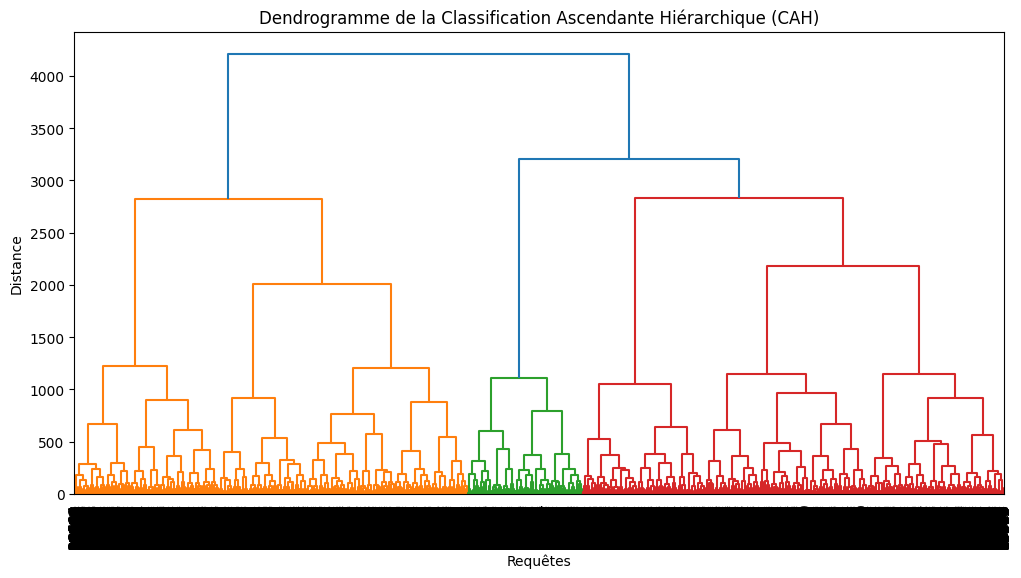

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(thc_embedding_3d, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, orientation='top', leaf_font_size=10)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique (CAH)')
plt.xlabel('Requêtes')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(thc_embedding_3d)
labels = kmeans.labels_
thc_en["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
for i in range(n_clusters):
    df = thc_en[thc_en["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY_TERMS"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
connet to cloud
data wrrapper
clean data efficiently by operationalizing preparations
oracle cloud
install spatial plugin
compatibility server
remote engine installed different machine
command line upgrade
artefacts
transforming from a data integration schema to a complex content schema


################## Cluster 1 ##################
mindbreeze
double login
esb runtime installer
batch commit
"kb"
tpostgresqlplusbulkexec
tdbsp myssql
ts3
tdc ports
tflowmetercatcher standard properties


################## Cluster 2 ##################
karaf.log
cumuative patch
"token endpoint" workday
mc git
tac job group
make your talend job aware of the location of your keystore
additional features "publish to nexus"
tjava vs tjavarow vs tjavaflex
tmcv curl command
7.3.1


################## Cluster 3 ##################
r2020-09 (cumulative patch) - talend esb runtime
talend cloud data fabric physical architecture diagrams
dr setup talend
adding a datas

scatter plot of the first two components:

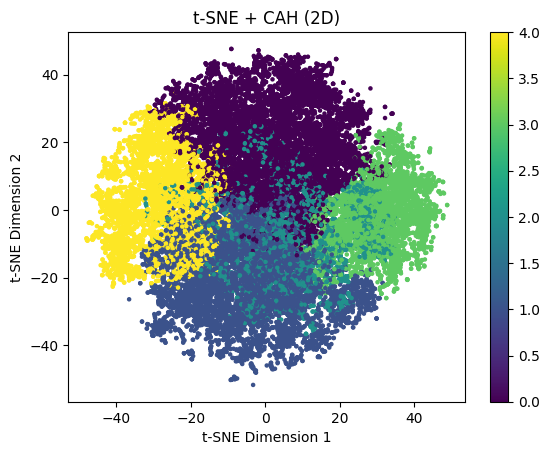

In [101]:
import matplotlib.pyplot as plt 

plt.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], c=thc_en["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + CAH (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

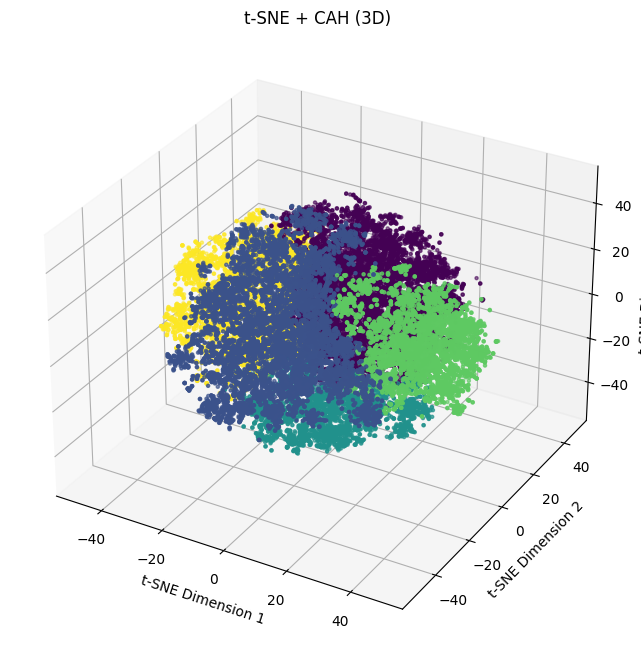

In [100]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], thc_embedding_3d[:, 2], c=thc_en["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + CAH (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()

#### 2- Google search

In [75]:
matrix_gg = np.vstack(google_embedd.embedding.values)
type(matrix_gg)

numpy.ndarray

In [76]:
tsne_reducer = TSNE(n_components=3)
#tsne_reducer = TSNE(n_components=3, perplexity=15, random_state=42, init="random", learning_rate=200)
gg_embedding_3d = tsne_reducer.fit_transform(matrix_gg)

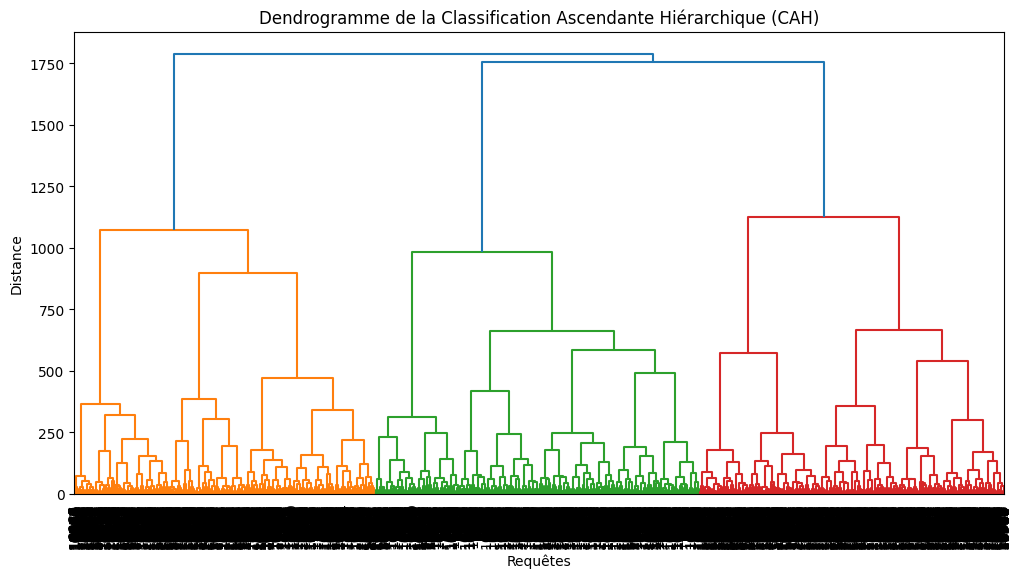

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(gg_embedding_3d, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, orientation='top', leaf_font_size=10)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique (CAH)')
plt.xlabel('Requêtes')
plt.ylabel('Distance')
plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  # À ajuster selon vos besoins

# Effectuer la CAH
cah = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_cah = cah.fit_predict(gg_embedding_3d)
google_embedd["Cluster"] = labels_cah


In [82]:
for i in range(n_clusters):
    df = google_embedd[google_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
twritejsonfield array
taccessinput
talend change language
what is image blob
comment remplir les cellules vides excel
talend build job context
talend data orchestration
tesbconsumer
globalmap.put talend
tassertcatcher


################## Cluster 1 ##################
example xml payload
traitement analytique
campaign owner
google docs json
サードパーティ cookie 許可
named entity extraction python
install kerberos windows
connecting to h2 database
business rules sql
accessing h2 console


################## Cluster 2 ##################
talend data connections
talend git integration
compiled code generated by talend studio
talend open studio 8.0.1 download
talend open studio download macos
talend data catalog 7.3
talend remote engine ports
docker service is not running
talend odata connector
the installation of jdk is necessary to run talend


################## Cluster 3 ##################
dd mmm yyyy
dd mm yyyy format
mmm dd yyyy example
java date

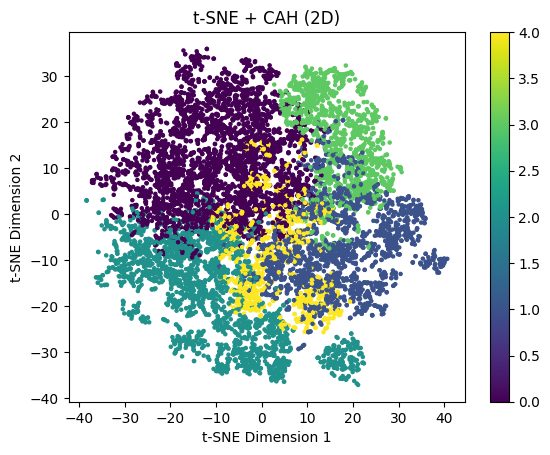

In [99]:
import matplotlib.pyplot as plt 

plt.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], c=google_embedd["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + CAH (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

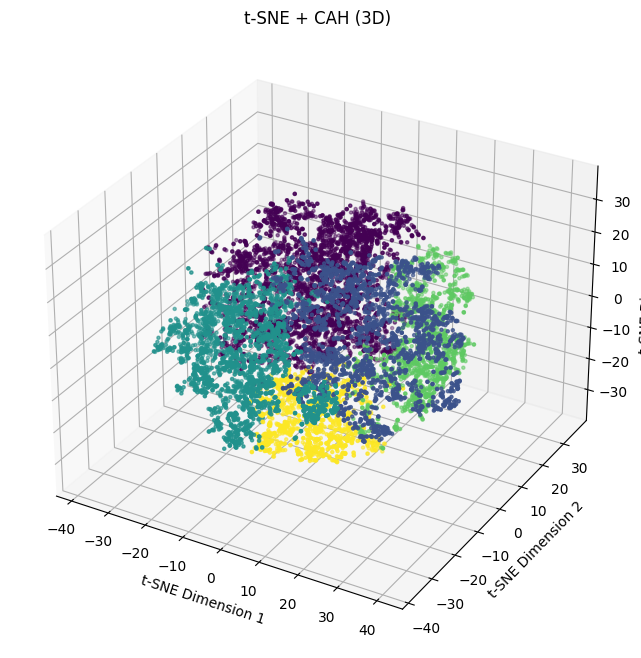

In [98]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], gg_embedding_3d[:, 2], c=google_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + CAH (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()

#### 3- IPC

In [85]:
matrix_ipc = np.vstack(ipc_embedd.embedding.values)
type(matrix_ipc)

numpy.ndarray

In [86]:
tsne_reducer = TSNE(n_components=3)
ipc_embedding_3d = tsne_reducer.fit_transform(matrix_ipc)

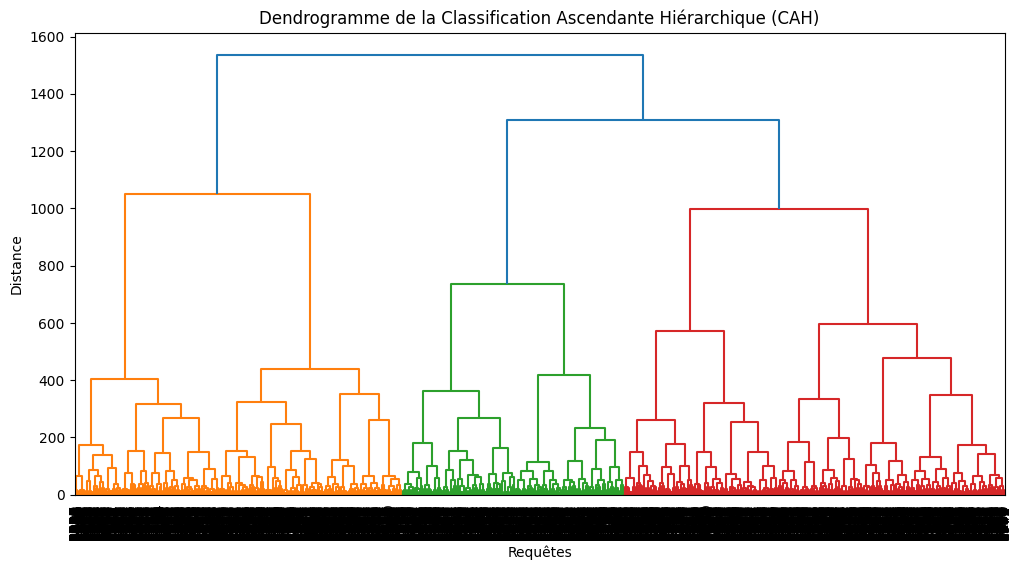

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(ipc_embedding_3d, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, orientation='top', leaf_font_size=10)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique (CAH)')
plt.xlabel('Requêtes')
plt.ylabel('Distance')
plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  # À ajuster selon vos besoins

# Effectuer la CAH
cah = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_cah = cah.fit_predict(ipc_embedding_3d)
ipc_embedd["Cluster"] = labels_cah


In [93]:
for i in range(n_clusters):
    df = ipc_embedd[ipc_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["INPUT_VALUES_SEARCH_QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
azure synapse
change region
Puppys. For. Sale. In. San francisco ca
Google clouds storage
Postgres
mapping file snowflake
bronto list
Runtime installation
parameter of type file
sftp extract zipped csv file


################## Cluster 1 ##################
License Key
ringcentral integration
job serverr
Unresolved requirement: Require-Bundle: org.eclipse.ui
Failed to deploy task - received expired event. Datetime not in sync between Talend Management Console and Remote Engine. Check and sync datetime of Remote Engine
New License
fraser
Job Lock
cluster server
jdk 1.11


################## Cluster 2 ##################
Hi, Team!
accidently went over
run profile
operations
tmc settings
hey guys, quick question regarding your plans
memory error
Hi Team, I have noticed that logs are not generating through TMC
demonstration video
Can I purchase 1 month


################## Cluster 3 ##################
is SPSS data Analysis tool?
csv new column


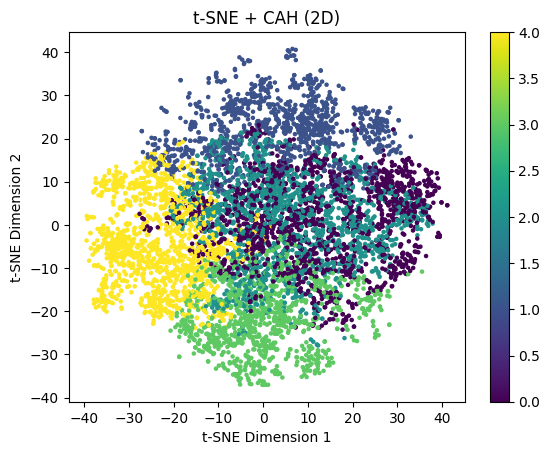

In [97]:
import matplotlib.pyplot as plt 

plt.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], c=ipc_embedd["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + CAH (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

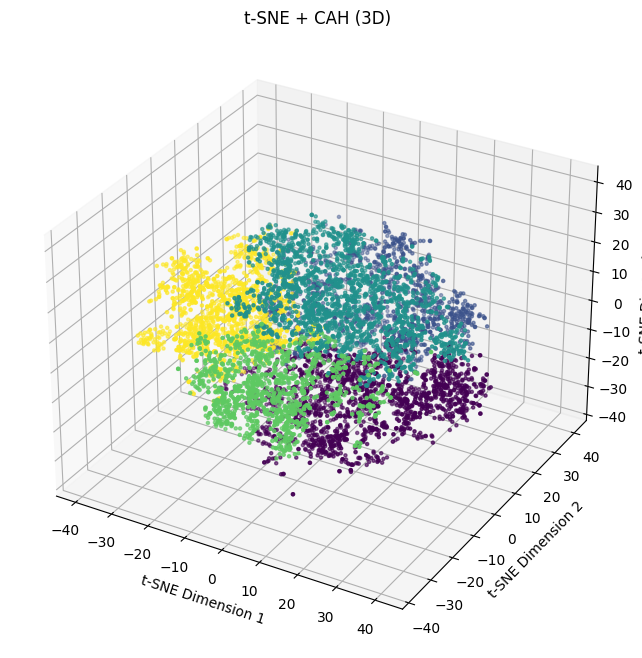

In [96]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], ipc_embedding_3d[:, 2], c=ipc_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + CAH (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()